<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis María Ramírez de la Rosa y Rodolfo Slay Ramos

**Fecha:** 25 de septiembre del 2020.

**Expediente** : 691761 y 715214.
**Profesor:** Oscar David Jaramillo Zuluaga.

#### Proyecto Modulo 2

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://cdn.aarp.net/content/dam/aarp/money/taxes/2020/06/1140-clock-irs-check-money.imgcache.rev0faeea298e4ef6d8fa7c39e18d5cf199.web.400.228.jpg" width="300" height="500" /> 

# <font color='green'> Ofuscando el Negocio
    
El proyecto consiste en poder hacer un predictivo de la Utilidad Operativa que va a tener una empresa que se dedica al crédito de nómina durante intervalos mensuales. Esto permitirá tomar mejores decisiones y poder tomar mejores decisiones en diversas áreas de la empresa. Ofuscando el Negocio, debido a que Ofuscar es el entendimiento y la capacidad de razonar o de darse cuenta con claridad de las cosas. Y esto es precisamente lo que queremos descifrar del Negocio que opera esta empresa; ¿cuál es la Utilidad Operativa que se tiene en esta empresa de crédito por nómina y su distribución posible?

## Objetivos

Se suele decir que el único riesgo que conllevan estas empresas es la renuncia o el despido de un empleado. Lo que se propone realizar en este proyecto es un predictivo de la Utilidad Operativa de una manera Mensual.

Como objetivos específicos:
- Se busca una manera para sacar los intereses reales que se cobran, ya que algunas tasas son globales y otras son sobre saldos insolutos y no se tiene una distinción.
- Se necesita determinar el plazo al que se toman los créditos para saber la velocidad con la cual se recupera el capital y poder ajustar las tasas pactadas a una manera mensual.
- Se busca determinar para cualquier dado el valor esperado a recolectar considerando que se distribuya el Saldo Vencido a través de todo crédito.



## Definición del Problema, Nodos y Variables

El escenario de negocio que se quiere simular es para un mes dado cual es la distribución de utilidad que se espera tener. 
Los supuestos que se están asumiendo son: 
 -	Que el número actual de créditos sea constante
 -	Que todos los créditos tendrán que realizar un pago el mes entrante

Los nodos para simular son:
 * El capital que se presta 
 * Los intereses que se cobran 
 * El plazo al que se presta 
 * El Saldo vencido que se tiene en un crédito

La razón por la que se eligieron estos nodos es porque son los datos más pertinentes a la operación. Las otras variables que se tienen son más para identificar al individuo y para la finalidad de este proyecto, eso no es necesario. Por lo que se denominará la tasa de ganancia mensual como:

$$ UtilidadPorcentualMensual = Ganancia – Perdidas$$

$$ Ganancia = \frac{Tasa * Capital}{plazo} $$

Esto representa la Ganancia como un monto únicamente excedente al que se prestó como capital.

$$ Perdidas = SaldoVencido $$

Es bastante sencillo debido a que el Saldo Vencido puede incluir parte del capital.


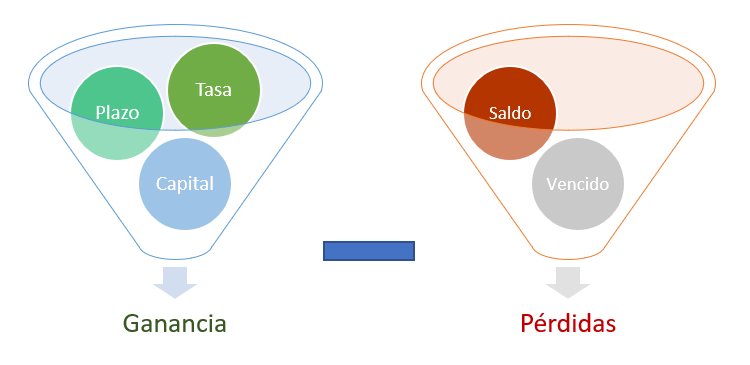

Esto representa la pérdida de todos los créditos hasta el momento, por lo que se considera que se mantiene linealidad y la tasa de cartera vencida es constante.

Para poder tener en resumen una función de Utilidad que se vería más o menos así:

$$ UtilidadMensual = \frac{Tasa * Capital}{plazo} - SaldoVencido$$

Y las ganancias y pérdidas mensuales estarían fluctuando conforme a las distintas variables que se tienen.


## Hipótesis y Supuestos

Se asumirá en las pérdidas que el Saldo Vencido incluye únicamente Capital e Interés ya que se tiene un mecanismo que mete el IVA cobrado sobre Intereses. Otra consideración que se realizará es que como no se tienen las variables que determinan el score crediticio de una persona, entonces se hará una selección aleatoria del capital, los intereses y los plazos, debido a que en teoría toda combinatoria es posible por la cantidad de excepciones y tratos especiales que se tienen de manera interna en la empresa. Incluyendo en algunos casos tener Intereses o Saldos vencidos cercanos a cero en una gran cantidad de créditos.

Las tasas que se están utilizando son globales, por lo que facilita mucho el cálculo de operaciones y de intereses. Se considera que el estado en el que se tienen los datos es fijo para poder realizar las proyecciones, en otras palabras, no se consideran cambios en las políticas o en el comportamiento de las empresas con las que se tiene contrato. 

La hipótesis principal que tenemos es que las Ganancias son superiores a las pérdidas. Se estarán realizando pruebas de hipótesis para la comprobación de los Nodos.


## Obtención de Base de Datos

La razón por la que se tiene tanta información sobre la conformación y el comportamiento de la Base de Datos es porque es una base de datos real de la empresa donde trabaja uno de los integrantes del equipo. Por razones de confidencialidad se mantendrá anónima. La base de datos es la versión real de hace 1 año, sin embargo, el acceso a una más actualizada para realizar dicho ejercicio no fue aprobada y se delimitó en gran medida los campos a los que se tuvo acceso. Se considera que para los fines de dicho proyecto es una Base de Datos ideal ya que tiene información y problemáticas que se tienen de una base de datos real.

## Simulación y Resultados

In [1]:
import warnings
import datetime
import numpy as np
import pylab as plb
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('precision', 3)

In [2]:
data=pd.read_excel('DatosCreditos(1).xlsx')
data.head()

,Ingreso,Capital_Inicial,Interes,Pagos,Saldo Vencido,Plazo,TasaAnual
0,16158.78,24000,4320.0,1573.333,0,18,0.18
1,7770.00,20000,7200.0,1511.111,0,18,0.36
2,18060.00,20000,9600.0,4933.333,18000,6,0.48
3,16000.00,22000,9240.0,5206.667,0,6,0.42
4,14460.00,17000,7140.0,1341.111,0,18,0.42


### Análisis y Distribución de las variables: "Capital_Inicial", "Interes_Inicial", "Plazo" y "Saldo Vencido"

In [3]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def estra_igualmente_espaciado(B):
    '''Funcion que regresa estratos.'''
    U= np.random.rand(B)
    i= np.arange(0,B)
    estratos= (U+i)/B
    return estratos

def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            xlabel:'x label',
                            ylabel: 'y label',
                            title: 'title'):
    '''Función para graficar el histograma de una distribución discreta'''
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Funcion que sirve para generar valores que siguen una distribucion discreta.'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

### Los Datos
Se observa la distribución de las variables:
* Capital Inicial
* Interés
* Plazo
* Saldo Vencido

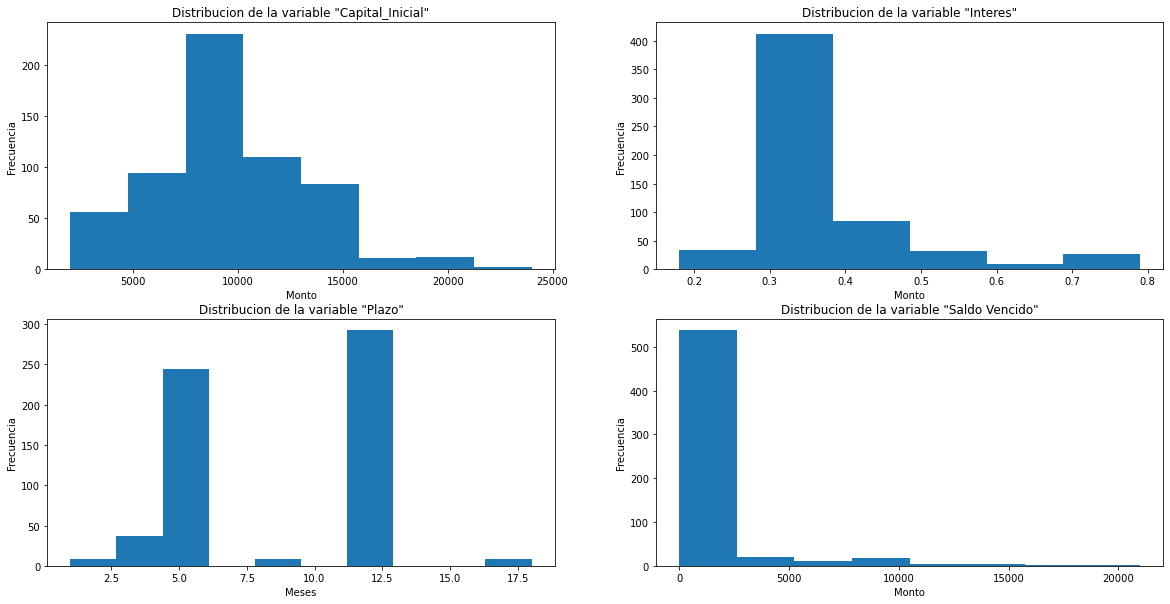

In [4]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(data['Capital_Inicial'], 8)
plt.title('Distribucion de la variable "Capital_Inicial"')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.subplot(2,2,2)
plt.hist(data['TasaAnual'], 6)
plt.title('Distribucion de la variable "Interes"')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.subplot(2,2,3)
plt.hist(data['Plazo'], 10)
plt.title('Distribucion de la variable "Plazo"')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.subplot(2,2,4)
plt.hist(data['Saldo Vencido'], 8)
plt.title('Distribucion de la variable "Saldo Vencido"')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

### Optimización de Distribuciones para cada Variable

In [5]:
var_name_1 = 'Capital_Inicial' 
var_name_2 = 'TasaAnual' 
var_name_3 = 'Plazo' 
var_name_4 = 'Saldo Vencido' 

cap = data[var_name_1]/1000
cap_prob=pd.DataFrame({'Valores': np.unique(cap, return_counts=True)[0],
                            'Frecuencias':np.unique(cap, return_counts=True)[1]})
cap_prob['Probabilidad']=cap_prob['Frecuencias']/len(cap)
cap_prob['Acumulada']=cap_prob.Probabilidad.cumsum()

tasa = data[var_name_2]*100
tasa_prob=pd.DataFrame({'Valores': np.unique(tasa, return_counts=True)[0],
                            'Frecuencias':np.unique(tasa, return_counts=True)[1]})
tasa_prob['Probabilidad']=tasa_prob['Frecuencias']/len(tasa)
tasa_prob['Acumulada']=tasa_prob.Probabilidad.cumsum()

plazo = data[var_name_3]
plazo_prob=pd.DataFrame({'Valores': np.unique(plazo, return_counts=True)[0],
                            'Frecuencias':np.unique(plazo, return_counts=True)[1]})
plazo_prob['Probabilidad']=plazo_prob['Frecuencias']/len(plazo)
plazo_prob['Acumulada']=plazo_prob.Probabilidad.cumsum()


sald_venc = data[var_name_4]/1000
sald_venc_prob=pd.DataFrame({'Valores': np.unique(sald_venc, return_counts=True)[0],
                            'Frecuencias':np.unique(sald_venc, return_counts=True)[1]})
sald_venc_prob['Probabilidad']=sald_venc_prob['Frecuencias']/len(sald_venc)
sald_venc_prob['Acumulada']=sald_venc_prob.Probabilidad.cumsum()

Aquí se puede ver la distribución para cada una de las variables discretas, ajustada por su frecuencia, se ven de una manera más predictiva que en la visualización anterior (únicamente histograma). Se usa la Estimación Kernel Density y se estima el parámetro de Banwidth que mejor represente a los datos.

In [6]:
# 20-fold cross-validation: Mejor Bandwidth para las distribuciones.
grid = GridSearchCV(KernelDensity(), {'bandwidth': np.linspace(0.1, 1.0, 30)}, cv=20)
# Variable 1:
grid.fit(np.array(data[var_name_1]).reshape(-1, 1))
bw_1 = grid.best_params_['bandwidth']
cap_grid=np.arange(1,26,0.01)
cap_pdf=kde_sklearn(cap, cap_grid, bandwidth=bw_1)
# Variable 2:
grid.fit(np.array(data[var_name_2]).reshape(-1, 1))
bw_2 = grid.best_params_['bandwidth']
tasa_grid=np.arange(0,80,0.01)
tasa_pdf=kde_sklearn(tasa, tasa_grid, bandwidth=bw_2)
# Variable 3:
grid.fit(np.array(data[var_name_3]).reshape(-1, 1))
bw_3 = grid.best_params_['bandwidth']
plazo_grid=np.arange(1,18,0.01)
plazo_pdf=kde_sklearn(plazo, plazo_grid, bandwidth=bw_3)
# Variable 4:
grid.fit(np.array(data[var_name_4]).reshape(-1, 1))
bw_4 = grid.best_params_['bandwidth']
sald_venc_grid=np.arange(0,21,0.01)
sald_venc_pdf=kde_sklearn(sald_venc, sald_venc_grid, bandwidth=bw_4)

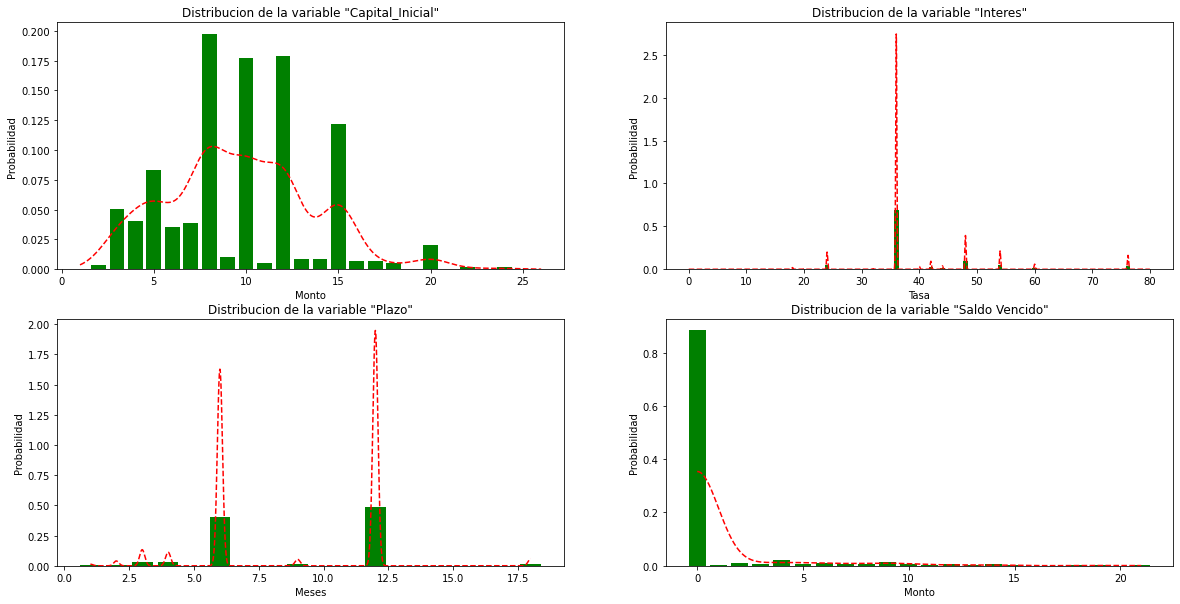

In [7]:
plt.figure(figsize=(20,10))
# Variable 1:
plt.subplot(2,2,1)
plt.bar(cap_prob.Valores, cap_prob.Probabilidad, color='g')
plt.plot(cap_grid, cap_pdf, 'r--')
plt.title('Distribucion de la variable "Capital_Inicial"')
plt.xlabel('Monto')
plt.ylabel('Probabilidad')
# Variable 2:
plt.subplot(2,2,2)
plt.bar(tasa_prob.Valores, tasa_prob.Probabilidad, color='g')
plt.plot(tasa_grid, tasa_pdf, 'r--')
plt.title('Distribucion de la variable "Interes"')
plt.xlabel('Tasa')
plt.ylabel('Probabilidad')
# Variable 3:
plt.subplot(2,2,3)
plt.bar(plazo_prob.Valores, plazo_prob.Probabilidad, color='g')
plt.plot(plazo_grid, plazo_pdf, 'r--')
plt.title('Distribucion de la variable "Plazo"')
plt.xlabel('Meses')
plt.ylabel('Probabilidad')
# Variable 4:
plt.subplot(2,2,4)
plt.bar(sald_venc_prob.Valores, sald_venc_prob.Probabilidad, color='g')
plt.plot(sald_venc_grid, sald_venc_pdf, 'r--')
plt.title('Distribucion de la variable "Saldo Vencido"')
plt.xlabel('Monto')
plt.ylabel('Probabilidad')
plt.show()

Ahora para hacer las distribuciones de las variables con datos aleatorios, crearemos 4 polinomios que se asemejen a las Funciones de Distribución de Probabilidad de cada una de las variables para usar la técnica de Aceptación y rechazo.

* Las Barras Verdes son los datos REALES.
* Los Cruces Rojos son con el KERNEL DENSITY.
* Las Asteriscos Azules son el POLINOMIO de polifit.


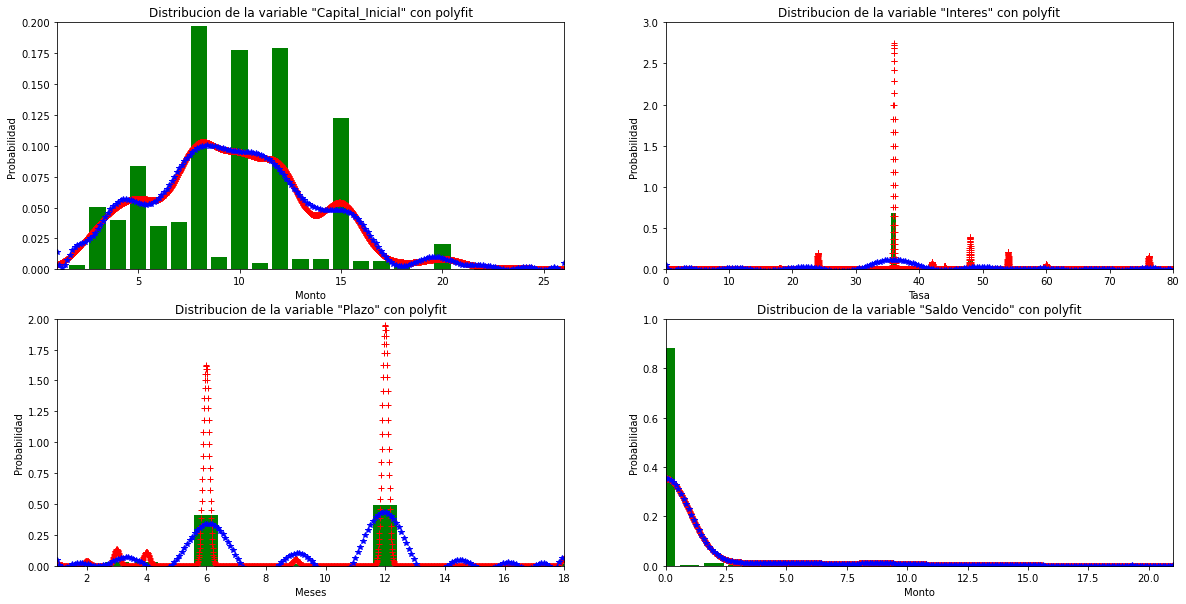

In [8]:
# Crear la función objetivo a partir de la línea roja usando polyfit.
plt.figure(figsize=(20,10))
# Variable 1:
plt.subplot(2,2,1)
x = cap_grid
y = cap_pdf
for x1, y1 in zip(x, y):
    plt.plot(x1, y1, 'r+')
z = np.polyfit(x, y, 30)
f_cap = np.poly1d(z)
for x1 in np.linspace(1, 26, 200):
    plt.plot(x1, f_cap(x1), 'b*')
plt.axis([1, 26, 0, 0.2])
plt.bar(cap_prob.Valores, cap_prob.Probabilidad, color='g')
plt.title('Distribucion de la variable "Capital_Inicial" con polyfit')
plt.xlabel('Monto')
plt.ylabel('Probabilidad')
# Variable 2:
plt.subplot(2,2,2)
x = tasa_grid
y = tasa_pdf
for x1, y1 in zip(x, y):
    plt.plot(x1, y1, 'r+')
z = np.polyfit(x, y, 40)
f_tasa = np.poly1d(z)
for x1 in np.linspace(0, 80, 200):
    plt.plot(x1, f_tasa(x1), 'b*')
plt.axis([0, 80, 0, 3])
plt.bar(tasa_prob.Valores, tasa_prob.Probabilidad, color='g')
plt.title('Distribucion de la variable "Interes" con polyfit')
plt.xlabel('Tasa')
plt.ylabel('Probabilidad')
# Variable 3:
plt.subplot(2,2,3)
x = plazo_grid
y = plazo_pdf
for x1, y1 in zip(x, y):
    plt.plot(x1, y1, 'r+')
z = np.polyfit(x, y, 30)
f_plazo = np.poly1d(z)
for x1 in np.linspace(1, 18, 200):
    plt.plot(x1, f_plazo(x1), 'b*')
plt.axis([1, 18, 0, 2])
plt.bar(plazo_prob.Valores, plazo_prob.Probabilidad, color='g')
plt.title('Distribucion de la variable "Plazo" con polyfit')
plt.xlabel('Meses')
plt.ylabel('Probabilidad')
# Variable 4:
plt.subplot(2,2,4)
x = sald_venc_grid
y = sald_venc_pdf
for x1, y1 in zip(x, y):
    plt.plot(x1, y1, 'r+')
z = np.polyfit(x, y, 30)
f_sald_venc = np.poly1d(z)
for x1 in np.linspace(0, 21, 200):
    plt.plot(x1, f_sald_venc(x1), 'b*')
plt.axis([0, 21, 0, 1])
plt.bar(sald_venc_prob.Valores, sald_venc_prob.Probabilidad, color='g')
plt.title('Distribucion de la variable "Saldo Vencido" con polyfit')
plt.xlabel('Monto')
plt.ylabel('Probabilidad')
plt.show()

### Generación de números aleatorios basados en las distribuciones anteriores:
Se utiliza el método de aceptación rechazo para cada una de las variables anteriores usando como función la que se creó en el polinomio. Se crean 2500 datos para cada una de las variables.


In [57]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo_distribution(R2:'Variables distruidas U~U(0,1)', R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar', t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    df = pd.DataFrame([R1,R2*t_x,np.zeros(len(R1))]).transpose()
    df[2] = [True if condition[i] else False for i in range(len(R1))]
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if df[2][i] == True else plt.plot(R1[i],R2[i]*t_x[i],'o') for i in range(len(R1))]          
    plt.show()
    return df

In [58]:
N=2500

#### Para La Variable: Capital Inicial

El máximo de f es: 0.10307155420428914


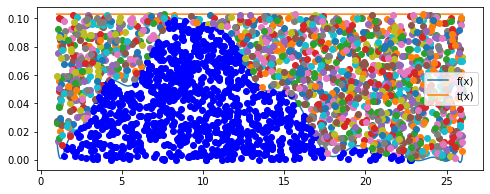

In [59]:
# Método de aceptación y rechazo cuando se toma t(x) constante
f = f_cap # Función objetivo  
max_f = max(cap_pdf) # Máximo de la función f
x = cap_grid  # Rango donde se graficará las funciones
t = lambda x: max_f*np.ones(len(x)) # Función t -> Función constante
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(8,3))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# uniformer entre el dominio de la función f(x) que para este ejemplo es [15,90]. Por
# lo tanto yo debo de generar R1 como un uniforme entre U ~(15,90)
R2 = np.random.rand(N)
R1 = np.random.uniform(1,26,N)
MAR_df_cap = Acep_rechazo_distribution(R2,R1,f,t)  # Regresa un DataFrame con Cada punto y si es Aceptado o Rechazado
plt.show()

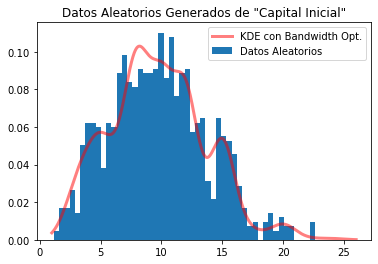

In [12]:
MAR_df_cap = MAR_df_cap[(MAR_df_cap[2]==True)]   # Filtro solo los Aceptados
plt.hist(MAR_df_cap[0], bins = 50, density = True, label='Datos Aleatorios')  # Hago un histograma de los datos aleatorios Simulados
plt.plot(cap_grid, cap_pdf, color='red', alpha=0.5, lw=3, label='KDE con Bandwidth Opt.')  # Con el Kernel Densitity
plt.title('Datos Aleatorios Generados de "Capital Inicial"')
plt.legend()
plt.show()

#### Para La Variable: Tasa

El máximo de f es: 2.7418942683108374


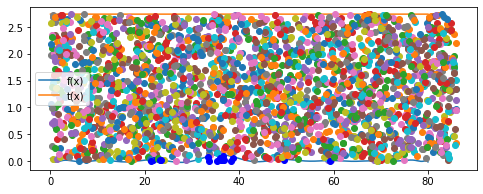

In [13]:
# Método de aceptación y rechazo cuando se toma t(x) constante
f = f_tasa # Función objetivo  
max_f = max(tasa_pdf) # Máximo de la función f
x = tasa_grid  # Rango donde se graficará las funciones
t = lambda x: max_f*np.ones(len(x)) # Función t -> Función constante
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(8,3))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# uniformer entre el dominio de la función f(x) que para este ejemplo es [15,90]. Por
# lo tanto yo debo de generar R1 como un uniforme entre U ~(15,90)
R2 = np.random.rand(N)
R1 = np.random.uniform(0,86,N)
MAR_df_tasa = Acep_rechazo_distribution(R2,R1,f,t)  # Regresa un DataFrame con Cada punto y si es Aceptado o Rechazado
plt.show()

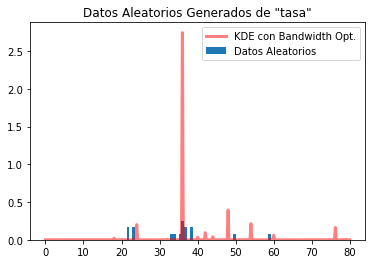

In [14]:
MAR_df_tasa = MAR_df_tasa[(MAR_df_tasa[2]==True)]   # Filtro solo los Aceptados
plt.hist(MAR_df_tasa[0], bins = 50, density = True, label='Datos Aleatorios')  # Hago un histograma de los datos aleatorios Simulados
plt.plot(tasa_grid, tasa_pdf, color='red', alpha=0.5, lw=3, label='KDE con Bandwidth Opt.')  # Con el Kernel Densitity
plt.title('Datos Aleatorios Generados de "tasa"')
plt.legend()
plt.show()

#### Para La Variable: Plazo

El máximo de f es: 1.948012472863161


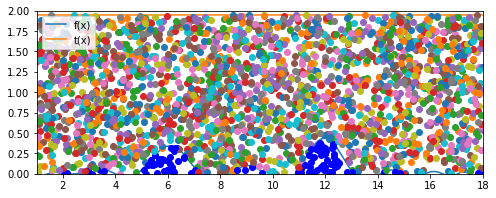

In [15]:
# Método de aceptación y rechazo cuando se toma t(x) constante
f = f_plazo # Función objetivo  
max_f = max(plazo_pdf) # Máximo de la función f
x = plazo_grid  # Rango donde se graficará las funciones
t = lambda x: max_f*np.ones(len(x)) # Función t -> Función constante
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(8,3))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.axis([1, 18, 0, 2])
plt.legend()
# Validación del método
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# uniformer entre el dominio de la función f(x) que para este ejemplo es [15,90]. Por
# lo tanto yo debo de generar R1 como un uniforme entre U ~(15,90)
R2 = np.random.rand(N)
R1 = np.random.uniform(1,18,N)
MAR_df_plazo = Acep_rechazo_distribution(R2,R1,f,t)  # Regresa un DataFrame con Cada punto y si es Aceptado o Rechazado
plt.show()

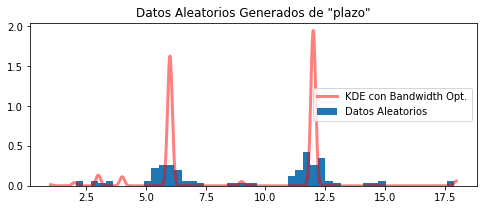

In [16]:
MAR_df_plazo = MAR_df_plazo[(MAR_df_plazo[2]==True)]   # Filtro solo los Aceptados
plt.figure(figsize=(8,3))
plt.hist(MAR_df_plazo[0], bins = 50, density = True, label='Datos Aleatorios')  # Hago un histograma de los datos aleatorios Simulados
plt.plot(plazo_grid, plazo_pdf, color='red', alpha=0.5, lw=3, label='KDE con Bandwidth Opt.')  # Con el Kernel Densitity
plt.title('Datos Aleatorios Generados de "plazo"')
plt.legend()
plt.show()

#### Para La Variable: Saldo Vencido

El máximo de f es: 0.35371355235215135


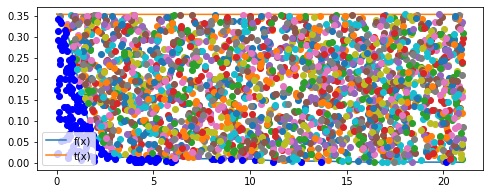

In [17]:
# Método de aceptación y rechazo cuando se toma t(x) constante
f = f_sald_venc # Función objetivo  
max_f = max(sald_venc_pdf) # Máximo de la función f
x = sald_venc_grid  # Rango donde se graficará las funciones
t = lambda x: max_f*np.ones(len(x)) # Función t -> Función constante
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.figure(figsize=(8,3))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
# Validación del método
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios 
# uniformer entre el dominio de la función f(x) que para este ejemplo es [15,90]. Por
# lo tanto yo debo de generar R1 como un uniforme entre U ~(15,90)
R2 = np.random.rand(N)
R1 = np.random.uniform(0,21,N)
MAR_df_sald_venc = Acep_rechazo_distribution(R2,R1,f,t)  # Regresa un DataFrame con Cada punto y si es Aceptado o Rechazado
plt.show()

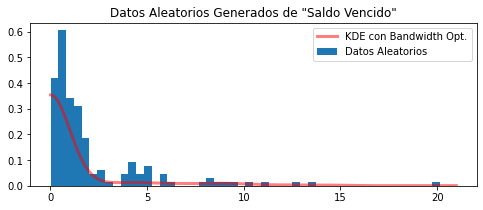

In [18]:
MAR_df_sald_venc = MAR_df_sald_venc[(MAR_df_sald_venc[2]==True)]   # Filtro solo los Aceptados
plt.figure(figsize=(8,3))
plt.hist(MAR_df_sald_venc[0], bins = 50, density = True, label='Datos Aleatorios')  # Hago un histograma de los datos aleatorios Simulados
plt.plot(sald_venc_grid, sald_venc_pdf, color='red', alpha=0.5, lw=3, label='KDE con Bandwidth Opt.')  # Con el Kernel Densitity
plt.title('Datos Aleatorios Generados de "Saldo Vencido"')
plt.legend()
plt.show()

Ahora regresamos las variables a sus unidades iniciales y hacemos que cada variable tenga la misma cantidad de datos.

In [19]:
rand_cap = (MAR_df_cap[0].reset_index(drop=True))
rand_tasa = (MAR_df_tasa[0].reset_index(drop=True))
rand_plazo = (MAR_df_plazo[0].reset_index(drop=True))
rand_sald_venc = (MAR_df_sald_venc[0].reset_index(drop=True))
max_freq = max(len(rand_cap), len(rand_tasa), len(rand_plazo), len(rand_sald_venc))
while len(rand_cap) < max_freq:
    rand_cap = pd.concat([rand_cap, rand_cap]).reset_index(drop=True)
while len(rand_sald_venc) < max_freq:
    rand_sald_venc = pd.concat([rand_sald_venc, rand_sald_venc]).reset_index(drop=True)
while len(rand_tasa) < max_freq:
    rand_tasa = pd.concat([rand_tasa, rand_tasa]).reset_index(drop=True)
while len(rand_plazo) < max_freq:
    rand_plazo = pd.concat([rand_plazo, rand_plazo]).reset_index(drop=True)
rand_cap = rand_cap.iloc[0:max_freq]
rand_tasa = rand_tasa.iloc[0:max_freq]
rand_plazo = rand_plazo.iloc[0:max_freq]
rand_sald_venc = rand_sald_venc.iloc[0:max_freq]

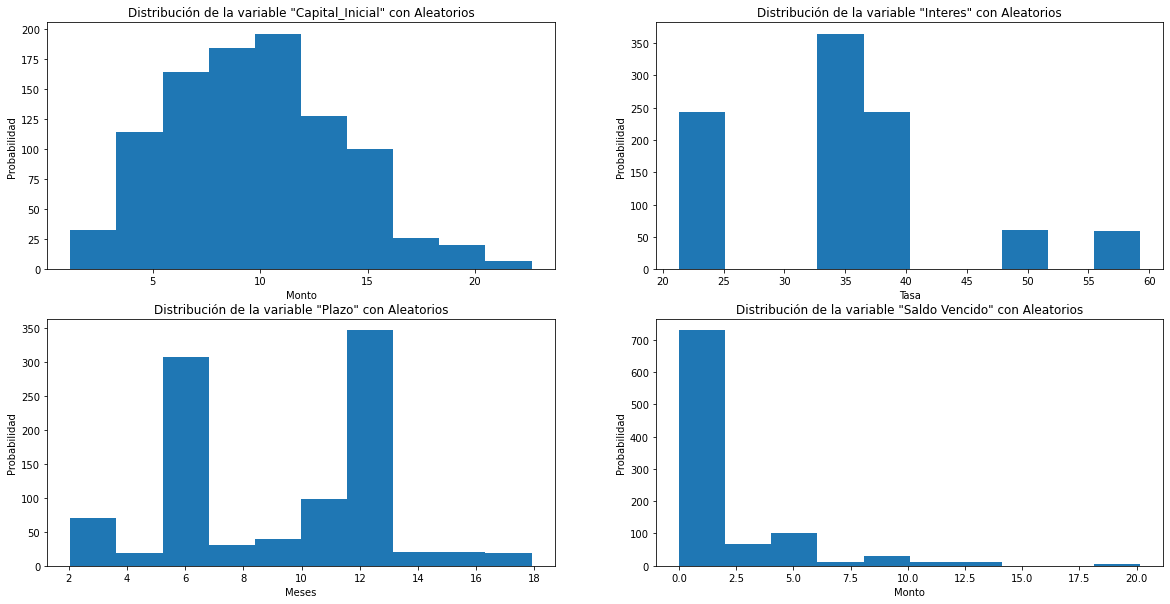

In [60]:
plt.figure(figsize=(20,10))
# Variable 1:
plt.subplot(2,2,1)
plt.hist(rand_cap)
plt.title('Distribución de la variable "Capital_Inicial" con Aleatorios')
plt.xlabel('Monto')
plt.ylabel('Probabilidad')
# Variable 2:
plt.subplot(2,2,2)
plt.hist(rand_tasa)
plt.title('Distribución de la variable "Interes" con Aleatorios')
plt.xlabel('Tasa')
plt.ylabel('Probabilidad')
# Variable 3:
plt.subplot(2,2,3)
plt.hist(rand_plazo)
plt.title('Distribución de la variable "Plazo" con Aleatorios')
plt.xlabel('Meses')
plt.ylabel('Probabilidad')
# Variable 4:
plt.subplot(2,2,4)
plt.hist(rand_sald_venc)
plt.title('Distribución de la variable "Saldo Vencido" con Aleatorios')
plt.xlabel('Monto')
plt.ylabel('Probabilidad')
plt.show()

A continuación, se muestras las pruebas Quantil-Quantil para cada una de las distribuciones anteriores, buscando que se asemejen lo más posible, sin embargo, es muy complicado siendo datos reales con distribuciones muy singulares en casos como la tasa y los plazos.

Usaremos la paquetería de Scipy para estimar los parámetros de cada una de las distribuciones.


Parametros de la variable "Capital_Inicial" con una distribución de tipo: beta
(1.002725327171991, 0.9542264938309094, 0.8367687978764993, 21.330669696991848)
Parametros de la variable "TasaAnual" con una distribución de tipo: laplace
(40.28212950623862, 9.500000000000135)
Parametros de la variable "Plazo" con una distribución de tipo: laplace
(9.55265642909647, 4.0)
Parametros de la variable "Saldo Vencido" con una distribución de tipo: expon
(0.0008664939757268009, 10.05)


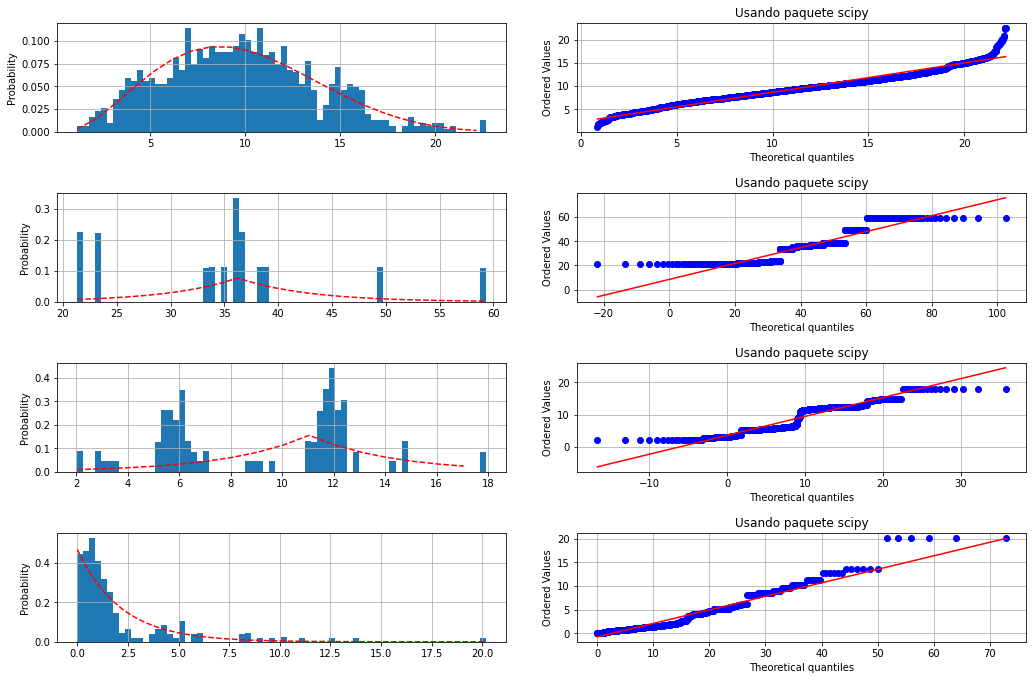

In [21]:
# DATA
measurements_1 = np.array(rand_cap)   
measurements_2 = np.array(rand_tasa) 
measurements_3 = np.array(rand_plazo)   
measurements_4 = np.array(rand_sald_venc) 
# Parametros de las distribuciones
divisiones = 68 # Cantidad de barras en el histograma
dist_1 = 'beta'
dist_2 = 'laplace'
dist_3 = 'laplace'
dist_4 = 'expon'
# GRAFICOS 
fig, ax = plt.subplots(4,2, figsize=(15,10))
fig.tight_layout(pad=4.0)
# PRIMERA DISTRIBUCIÓN
ax[0,0].hist(measurements_1,divisiones,density=True)  # Histograma
params = getattr(st, dist_1).fit(measurements_1)  # Parametros de la distribución que mejor se acomodan
x = np.arange(measurements_1.min(), measurements_1.max(), 1)  # Espacio en X
y = getattr(st, dist_1).pdf(x, *params)  # Graficar PDF de la distribución que queremos probar
ax[0,0].plot(x,y,'r--')
ax[0,0].set_ylabel('Probability')
ax[0,0].grid()
# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist): Usando scipy
grap2 = st.probplot(measurements_1, dist=dist_1, sparams=getattr(st, dist_1).fit(x)[:], plot=ax[0,1], fit=True)
ax[0,1].grid()
ax[0,1].set_title('Usando paquete scipy')
print('Parametros de la variable "' + var_name_1 + '" con una distribución de tipo: ' + dist_1)
print(getattr(st, dist_1).fit(x)[:])
# SEGUNDA DISTRIBUCIÓN
ax[1,0].hist(measurements_2,divisiones,density=True)  # Histograma
params = getattr(st, dist_2).fit(measurements_2)  # Parametros de la distribución que mejor se acomodan
x = np.arange(measurements_2.min(), measurements_2.max(), 0.1)  # Espacio en X
y = getattr(st, dist_2).pdf(x, *params)  # Graficar PDF de la distribución que queremos probar
ax[1,0].plot(x,y,'r--')
ax[1,0].set_ylabel('Probability')
ax[1,0].grid()
# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist): Usando scipy
grap2 = st.probplot(measurements_2, dist=dist_2, sparams=getattr(st, dist_2).fit(x)[:], plot=ax[1,1], fit=True)
ax[1,1].grid()
ax[1,1].set_title('Usando paquete scipy')
print('Parametros de la variable "' + var_name_2 + '" con una distribución de tipo: ' + dist_2)
print(getattr(st, dist_2).fit(x)[:])
# TERCERA DISTRIBUCIÓN
ax[2,0].hist(measurements_3,divisiones,density=True)  # Histograma
params = getattr(st, dist_3).fit(measurements_3)  # Parametros de la distribución que mejor se acomodan
x = np.arange(measurements_3.min(), measurements_3.max(), 1)  # Espacio en X
y = getattr(st, dist_3).pdf(x, *params)  # Graficar PDF de la distribución que queremos probar
ax[2,0].plot(x,y,'r--')
ax[2,0].set_ylabel('Probability')
ax[2,0].grid()
# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist): Usando scipy
grap2 = st.probplot(measurements_3, dist=dist_3, sparams=getattr(st, dist_3).fit(x)[:], plot=ax[2,1], fit=True)
ax[2,1].grid()
ax[2,1].set_title('Usando paquete scipy')
print('Parametros de la variable "' + var_name_3 + '" con una distribución de tipo: ' + dist_3)
print(getattr(st, dist_3).fit(x)[:])
# CUARTA DISTRIBUCIÓN
ax[3,0].hist(measurements_4,divisiones,density=True)  # Histograma
params = getattr(st, dist_4).fit(measurements_4)  # Parametros de la distribución que mejor se acomodan
x = np.arange(measurements_4.min(), measurements_4.max(), 0.1)  # Espacio en X
y = getattr(st, dist_4).pdf(x, *params)  # Graficar PDF de la distribución que queremos probar
ax[3,0].plot(x,y,'r--')
ax[3,0].set_ylabel('Probability')
ax[3,0].grid()
# gráfica de Q-Q entre mis datos y la curva que quiero probar que sigue mi distribución (dist): Usando scipy
grap2 = st.probplot(measurements_4, dist=dist_4, sparams=getattr(st, dist_4).fit(x)[:], plot=ax[3,1], fit=True)
ax[3,1].grid()
ax[3,1].set_title('Usando paquete scipy')
print('Parametros de la variable "' + var_name_4 + '" con una distribución de tipo: ' + dist_4)
print(getattr(st, dist_4).fit(x)[:])
plt.show()

### Utilidad y Pérdida Esperada Usando Montecarlo

In [50]:
r_1 = np.array(rand_cap)
r_2 = np.array(rand_tasa)
r_3 = np.array(rand_plazo)
r_4 = np.array(rand_sald_venc)
# Ordenar aleatoriamente los datos de las distribuciones creadas.
np.random.shuffle(r_1)
np.random.shuffle(r_2)
np.random.shuffle(r_3)
np.random.shuffle(r_4)
# Para optimizar el calculo de la ultilidad se hará de forma vectorizada
GananciaM = (r_1*1000 * (r_2/100) / 12 * r_3)
Perdida = (r_4)*100

In [51]:
columns = [var_name_1, var_name_2, var_name_3, var_name_4, 'Ganancia', 'Perdida']
res = np.array([r_1, r_2, r_3, r_4, GananciaM, Perdida]).transpose()
df_results = pd.DataFrame(data=res, columns=columns)
df_results.head()

,Capital_Inicial,TasaAnual,Plazo,Saldo Vencido,Ganancia,Perdida
0,16.301,23.478,11.747,1.407,3746.327,140.659
1,14.809,23.223,6.386,0.894,1830.079,89.386
2,6.872,23.478,5.527,1.601,743.095,160.081
3,8.534,21.332,9.189,1.698,1394.138,169.835
4,10.750,36.256,14.247,1.064,4627.135,106.406


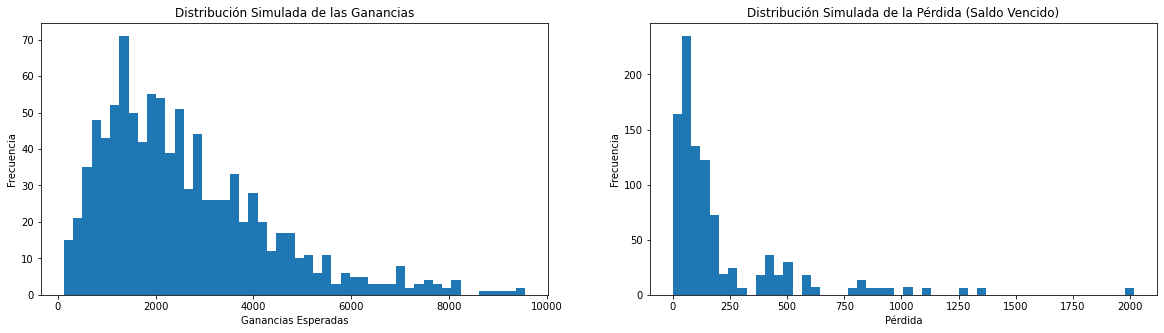

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(df_results['Ganancia'], bins=50)
plt.title('Distribución Simulada de las Ganancias')
plt.xlabel('Ganancias Esperadas')
plt.ylabel('Frecuencia')
plt.subplot(1,2,2)
plt.hist(df_results['Perdida'], bins=50)
plt.title('Distribución Simulada de la Pérdida (Saldo Vencido)')
plt.xlabel('Pérdida')
plt.ylabel('Frecuencia')
plt.show()

In [54]:
print('Utilidad Esperada por Crédito')
print((np.average(df_results['Ganancia'])-np.average(df_results['Perdida'])))


Utilidad Esperada por Crédito
2389.101144605521


### Intervalo de Confianza del Método Montecarlo de la Ganancia Estimada

In [55]:
x_prom = df_results['Ganancia'].mean()
x_std = df_results['Ganancia'].std()
n_conf = 0.95
z = st.norm.ppf(n_conf)
n = max_freq

res = [x_prom-(z*(x_std/(np.sqrt(n)))), x_prom+(z*(x_std/(np.sqrt(n))))]

print('Con un nivel de Confianza del ' + str(n_conf*100) + ' %')
print('la ganancia esperada por cada cliente esta en el intervalo: ')
print(res)

Con un nivel de Confianza del 95.0 %
la ganancia esperada por cada cliente esta en el intervalo: 
[2513.8081625451678, 2693.6541122150293]


In [56]:
x_prom = df_results['Perdida'].mean()
x_std = df_results['Perdida'].std()
n_conf = 0.95
z = st.norm.ppf(n_conf)
n = max_freq

res = [x_prom-(z*(x_std/(np.sqrt(n)))), x_prom+(z*(x_std/(np.sqrt(n))))]

print('Con un nivel de Confianza del ' + str(n_conf*100) + ' %')
print('la perdida esperada por cada cliente esta en el intervalo: ')
print(res)

Con un nivel de Confianza del 95.0 %
la perdida esperada por cada cliente esta en el intervalo: 
[199.21580930992155, 230.04417623923626]
